#### $\text{Q1: Hilbert Matrix Conditioning}$

In [10]:
from __future__ import division
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as npla
import scipy.linalg as spla

In [11]:
def hilbert_matrix(n):
    '''
    Initialize a Hilbert matrix of order n x n
    '''
    H = [[1/(i+j+1) for j in range(n)] for i in range(n)]
    H = np.array(H)
    return H

In [12]:
def init_equation(n):
    '''
    returns H,b where b = Hx and x = [1]*n
    '''
    H = hilbert_matrix(n)
    b = np.matmul(H,np.array([1]*n))
    return H, b

In [13]:
def approximate_solution(H,b):
    '''
    approximate solution for equation Hx = b
    
    P,L,U -> LU factorization of H with permutation matrix P
    
    Hx = b
    -> PLUx = b
    -> LUx = P.T*b (P.T = P^(-1)) 
    
    Forward Solve for Ly = P.T*b
    Backward Solve for Ux = y
    
    returns: x
    '''
    P,L,U = spla.lu(H)
    Pb = P.T@b
    y = spla.solve_triangular(L,Pb,lower=True)
    x = spla.solve_triangular(U,y,lower=False)
    return x

In [14]:
def residual_norm(H,b,x_cap):
    r = b - np.matmul(H,x_cap)
    r_norm = max(abs(r))
    print('Infinity norm of residual r:',r_norm)
    return r_norm

In [15]:
def error_norm(x_cap,x):
    delta_x = x_cap - x
    delta_x_norm = max(abs(delta_x))
    print('infinity norm of error:',delta_x_norm)
    return delta_x_norm

$\text{We solve the Linear System }{Hx = b}\text{ and obtain both the approximate and exact solutions}$
${x^{'}\text{ and }x \text{ respectively.}}$

$\text{The Hilbert Matrix is generated for n = 1,2..,15.}$
$\text{Next, we compute the }{\infty}\text{-norm for the residual }{r = b - Hx^{'}}\text{and the }{\infty}\text{-norm for the error }$
${\Delta x = x^{'}-x \text{  }\forall\text{ }1\leq n\leq 15}$

In [19]:
residual_norms = []
error_norms = []
for i in range(1,16):
    print("n =",i)
    H, b = init_equation(i)
    x_cap = approximate_solution(H,b)
    x = [1]*i
    residual_norms.append(residual_norm(H,b,x_cap))
    error_norms.append(error_norm(x_cap,x))
    print()

n = 1
Infinity norm of residual r: 0.0
infinity norm of error: 0.0

n = 2
Infinity norm of residual r: 0.0
infinity norm of error: 6.661338147750939e-16

n = 3
Infinity norm of residual r: 0.0
infinity norm of error: 9.992007221626409e-15

n = 4
Infinity norm of residual r: 0.0
infinity norm of error: 1.949551631241775e-13

n = 5
Infinity norm of residual r: 4.440892098500626e-16
infinity norm of error: 2.683431254979496e-11

n = 6
Infinity norm of residual r: 2.220446049250313e-16
infinity norm of error: 4.4203130045161743e-10

n = 7
Infinity norm of residual r: 0.0
infinity norm of error: 1.7122413042969242e-08

n = 8
Infinity norm of residual r: 4.440892098500626e-16
infinity norm of error: 2.3511776769957748e-07

n = 9
Infinity norm of residual r: 2.220446049250313e-16
infinity norm of error: 1.5975441239879373e-05

n = 10
Infinity norm of residual r: 2.220446049250313e-16
infinity norm of error: 0.0008145607536313992

n = 11
Infinity norm of residual r: 4.440892098500626e-16
infin

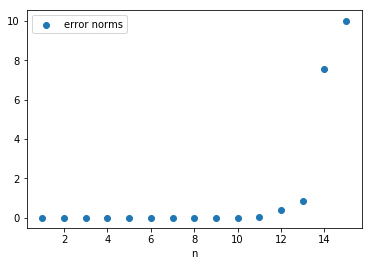

In [20]:
x_axis = np.arange(1,16,1)
plt.xlabel('n')
plt.scatter(x_axis, error_norms, label='error norms')
plt.legend(loc='upper left')
plt.show()

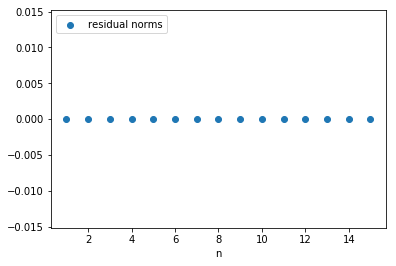

In [21]:
plt.xlabel('n')
plt.scatter(x_axis, residual_norms, label='residual norms')
plt.legend(loc='upper left')
plt.show()

$\text{Next, to determine where error becomes 100%, we need to compute the }{\infty}\text{-norm }$
$\text{of the relative error }{\frac{||\Delta x||}{||x||} = \frac{||x^{'}-x||}{||x||}}\text{ and observe where it grows more than 1.}$
$\text{Also, since }{||x||_{\infty} = 1}\text{, relative error is nothing but }{||x^{'}-x||_{\infty}.}$
$\text{So, we need to determine the first n for which }{||x^{'}-x||_{\infty} > 1}$

In [22]:
for i in range(len(error_norms)):
    if error_norms[i] > 1:
        print('n can be as large as',i+1)
        break

n can be as large as 14


$\text{And hence, n can be as large as 14.}$

##### $\text{Ashwin Singh}$
##### $\text{2017222}$